In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [874]:
##this creates the payouts for each place. Generated from WSOP.com
##tourney details: $500+65, 2000 runners, 300 get paid
def create_pays():
    payouts = []
    for i in range(5007):
        payouts.append(0)
    for i in range(180):
        payouts.append(377.31)
    for i in range(162):
        payouts.append(417.25)
    for i in range(144):
        payouts.append(461.39)
    for i in range(126):
        payouts.append(510.22)
    for i in range(108):
        payouts.append(564.23)
    for i in range(90):
        payouts.append(623.89)
    for i in range(45):
        payouts.append(689.92)
    for i in range(45):
        payouts.append(762.93)
    for i in range(36):
        payouts.append(1042.34)
    for i in range(27):
        payouts.append(1506.14)
    for i in range(18):
        payouts.append(2176.34)
    for i in range(9):
        payouts.append(3144.48)
    for i in range(4):
        payouts.append(4543.57)
    for i in range(4):
        payouts.append(6565)
    payouts.append(9485.88)
    payouts.append(13706.26)
    payouts.append(19804.58)
    payouts.append(28615.93)
    payouts.append(41347.69)
    payouts.append(59744.03)
    payouts.append(86325.43)
    payouts.append(124733.36)
    payouts.append(180234.73)
    arr = np.array(payouts)
    return arr



In [875]:
##verify sum and length of payouts array. summing up every result, we get the prize pool of 
#$1202800 and we see that the 6014 starting runners is correct
print sum(create_pays())
len(create_pays())

1202800.0


6014

In [877]:
#the average return for a 30% ROI player
215*1.3

279.5

In [879]:
#This is really equivalent to 40% return from what is committed to the prize pool 
(279.5-200)/200

0.3975

<h3>Payout Distribution</h3>
Looking at the graph below, it is very clear why tournament poker is a high variance game. We see that first place gets roughly 15% of the total prize pool. That's 838x your money if you win! The payout structure is extremely top heavy.

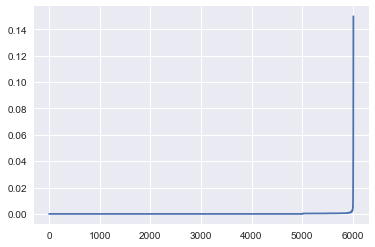

In [880]:
##looking at the initial distribution of payouts. 
arr = create_pays()
plt.plot(arr/1202800.0) #divide by total prize pool for % of purse

<h3>Creating p values for Distribution of results</h3>
We need to create a probability distribution for what place a 30% ROI player will finish in. For 30%, the average return is 695. This is really a return of 1.39x when we factor in the rake (since the amount contributed to prize pool is $500). We need to have different hypotheses for what the probability distribution looks like. We know one thing to be true: the trend for this distribution must be increasing as more people are eliminated for a profitable player. So, let's try out different probability distributions

<h3>General Form of the Equation</h3>
$1/6014 * \sum_{x=1}^{6014} f(x)p(x) = 279.5$
<br></br><br></br>
where p(x) is the probability of finishing in xth place and f(x) is the payout amount for that position

<h3>Case 1-- Linear:</h3> $p(x) = mx+ b$<br></br> 
Let's assume that the probability for each place increases linearly as the number of players eliminated increases. We need to find the set of (m,b)'s where the general form of the equation is satisfied, and find the pair that makes the most sense.

In [1053]:
def probs_linear(m,b):
    probs = []
    for x in range(6014):
        probs.append(m*x+b)
    probs = np.array(probs)
    return 1.0*probs/sum(probs)
    

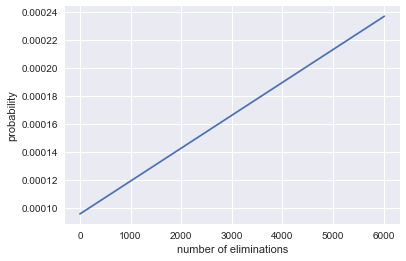

In [903]:
#n is the number of eliminations
plt.plot(probs_linear(.02,81.32))
plt.xlabel('number of eliminations')
plt.ylabel('probability')

In [643]:
def calc_ev_linear(m,b):
    probs = probs_linear(m,b)
    payouts = create_pays()
    return np.dot(probs,payouts)
        

In [1007]:
calc_ev_linear(.02,81.32)

850680.3


279.5002413186246

It assumes that the probability of first is 2.48x more likely than getting last, and increasing linear as eliminations increase.

<h3>Monte Carlo Simulations</h3>
Let's build distributions for different sample sizes and see what they look like. To do this, we can randomly draw from the probability density function, and by law of large numbers, 
we know that these simulated distributions must be approximately equal to the true distributions

In [914]:
#first we have to build the cumulative probability density function
def cum_density_lin():
    probs = np.array(probs_linear(.02,81.32))
    cum_probs = []
    for i in range(1,6015):
        cum_probs.append(sum(probs[:i]))
    return cum_probs

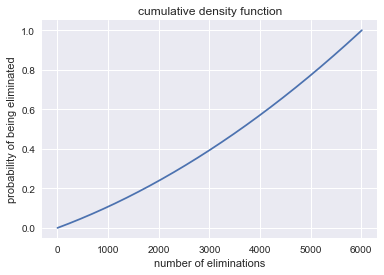

In [919]:
#plot the cumulative density function
plt.plot(cum_density_lin())
plt.title('cumulative density function')
plt.xlabel('number of eliminations')
plt.ylabel('probability of being eliminated')

In [1085]:
import math
cum_lin =cum_density_lin()
payouts = create_pays()
def simulation_linear():
    #if not in the money
    num = np.random.rand()
    b = 81.32/850680.3
    a = .01/850680.3
    c = -1.0*num
    quad = (-b + math.sqrt(b**2 - 4*a*c))/(2*a)
    n1 = int(math.floor(quad))
    if n1>0:
        n1-=1
    while cum_lin[n1]<num:
        n1+=1
    return payouts[n1]

    
    

In [1086]:
def monte_linear(n):
    results = 0
    for i in range(n):
        results+=simulation_linear()
    return results - n*215

In [1150]:
results = []
for i in range(10000):
    results.append(monte_linear(400))
results =np.array(results)

In [1151]:
results =np.sort(results)
##the five worst results
results[0:5]

array([-50525.78, -49211.88, -49186.36, -48837.57, -48235.43])

In [1152]:
##the five best results
results[-5:]

array([ 498515.7 ,  507982.72,  523666.  ,  543177.52,  694702.25])

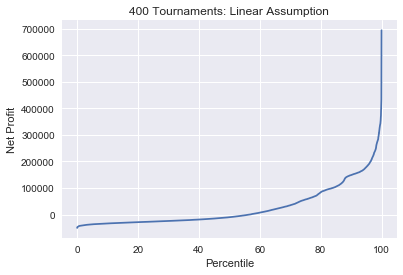

In [1164]:
p = np.linspace(0,100,10000)
plt.plot(p,results)
plt.xlabel('Percentile')
plt.ylabel('Net Profit')
plt.title('400 Tournaments: Linear Assumption')

What is the probability of loss?

In [1154]:
print 'probability of losing is ' + str(len([i for i in results if i<0])/len(results))

probability of losing is 0.5675


In [1157]:
results.std()

77136.819508765053

In [1159]:
results.mean()

25722.703838000016

In [1162]:
print results[9985]
print results[15]

397240.53
-46876.27


In [1163]:
results[5000]

-10293.140000000072

In [1165]:
results[-1]

694702.25000000012